In [2]:
import pandas as pd
import umap
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
import os




### Embeddings STS pour dHCP pour un latent de taille 32

In [15]:
# Charger l'espace latent
embeddings_STS_dHCP = pd.read_csv('/neurospin/dico/data/deep_folding/current/models/Champollion_V1_after_ablation/STs_right/name08-32-58_52/dHCP_random_embeddings/full_embeddings.csv', index_col=0)
# Charger les labels
labels_dHCP = pd.read_csv('/neurospin/dico/data/deep_folding/current/datasets/dHCP_374_subjects/participants.csv')

print("Shape embeddings",embeddings_STS_dHCP.shape)
print("Shape labels", labels_dHCP.shape)

# Filtrer les lignes avec labels
embeddings_STS_dHCP= embeddings_STS_dHCP.loc[embeddings_STS_dHCP.index.isin(labels_dHCP['Subject'])]
# Fusionner les labels
embeddings_STS_dHCP = embeddings_STS_dHCP.join(labels_dHCP.set_index('Subject'))

print(embeddings_STS_dHCP.columns)

print("Shape embeddings",embeddings_STS_dHCP.shape)
print("Shape labels", labels_dHCP.shape)





Shape embeddings (374, 32)
Shape labels (374, 8)
Index(['dim1', 'dim2', 'dim3', 'dim4', 'dim5', 'dim6', 'dim7', 'dim8', 'dim9',
       'dim10', 'dim11', 'dim12', 'dim13', 'dim14', 'dim15', 'dim16', 'dim17',
       'dim18', 'dim19', 'dim20', 'dim21', 'dim22', 'dim23', 'dim24', 'dim25',
       'dim26', 'dim27', 'dim28', 'dim29', 'dim30', 'dim31', 'dim32',
       'session_id', 'birth_age', 'Preterm_28', 'Preterm_30', 'Preterm_32',
       'Preterm_34', 'Preterm_37'],
      dtype='object')
Shape embeddings (374, 39)
Shape labels (374, 8)


In [4]:
# Première UMAP
X_babies= embeddings_STS_dHCP.iloc[:,:32].values
Xs_babies = StandardScaler().fit_transform(X_babies)
umap_2d = umap.UMAP(n_components=2, random_state=42).fit_transform(Xs_babies)



/neurospin/dico/rmenasria/Runs/03_main/Program/main_pixi/.pixi/envs/default/lib/python3.11/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/neurospin/dico/rmenasria/Runs/03_main/Program/main_pixi/.pixi/envs/default/lib/python3.11/site-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


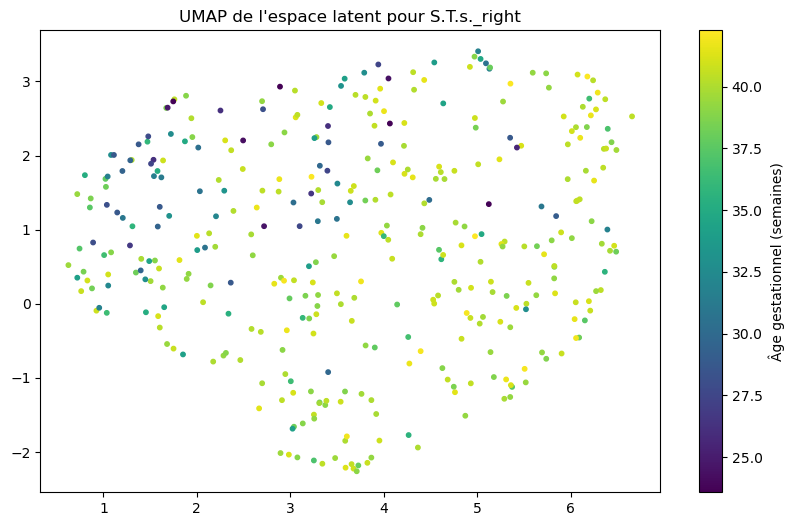

In [5]:
# Visualisation
plt.figure(figsize=(10, 6))
plt.scatter(umap_2d[:, 0], umap_2d[:, 1], c=embeddings_STS_dHCP['birth_age'], cmap='viridis', s=10)
plt.colorbar(label='Âge gestationnel (semaines)')
plt.title("UMAP de l'espace latent pour S.T.s._right")
plt.show()

### Embeddings STS pour UKB pour un latent de taille 32

In [16]:
# Charger l'espace latent
embeddings_STS_UKB = pd.read_csv('/neurospin/dico/data/deep_folding/current/models/Champollion_V1_after_ablation/STs_right/name08-32-58_52/ukb40_random_embeddings/full_embeddings.csv', index_col=0)

print("Shape embeddings",embeddings_STS_UKB.shape)



Shape embeddings (42433, 32)


In [17]:
# Deuxième UMAP
X_adults= embeddings_STS_UKB.iloc[:, :32].values
global_scaler = StandardScaler()
Xs_adults = global_scaler.fit_transform(X_adults)
umap_2d = umap.UMAP(n_components=2, random_state=42).fit_transform(Xs_adults)

/neurospin/dico/rmenasria/Runs/03_main/Program/main_pixi/.pixi/envs/default/lib/python3.11/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/neurospin/dico/rmenasria/Runs/03_main/Program/main_pixi/.pixi/envs/default/lib/python3.11/site-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


/tmp/ipykernel_2133472/3049222940.py:3: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(umap_2d[:, 0], umap_2d[:, 1], cmap='viridis', s=10)


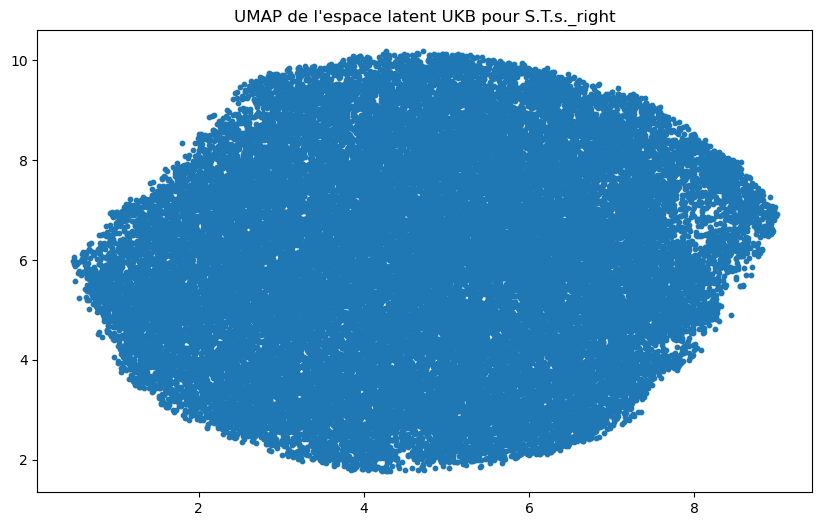

In [20]:
# Visualisation
plt.figure(figsize=(10, 6))
plt.scatter(umap_2d[:, 0], umap_2d[:, 1], cmap='viridis', s=10)
plt.title("UMAP de l'espace latent UKB pour S.T.s._right")
plt.show()

### Projection des bébés dans l'espace latent des adultes

In [19]:
# Entraîner UMAP sur les adultes
umap_model = umap.UMAP(n_components=2, random_state=42)
adult_2d = umap_model.fit_transform(Xs_adults)

X_babies= embeddings_STS_dHCP.iloc[:,:32].values
Xs_babies = global_scaler.transform(X_babies)

# Projeter les bébés dans cet espace
baby_2d = umap_model.transform(Xs_babies)



/neurospin/dico/rmenasria/Runs/03_main/Program/main_pixi/.pixi/envs/default/lib/python3.11/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/neurospin/dico/rmenasria/Runs/03_main/Program/main_pixi/.pixi/envs/default/lib/python3.11/site-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(
/neurospin/dico/rmenasria/Runs/03_main/Program/main_pixi/.pixi/envs/default/lib/python3.11/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


/tmp/ipykernel_2133472/2549529530.py:11: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(umap_2d[:, 0], umap_2d[:, 1], cmap='grey', s=10, alpha=0.05)


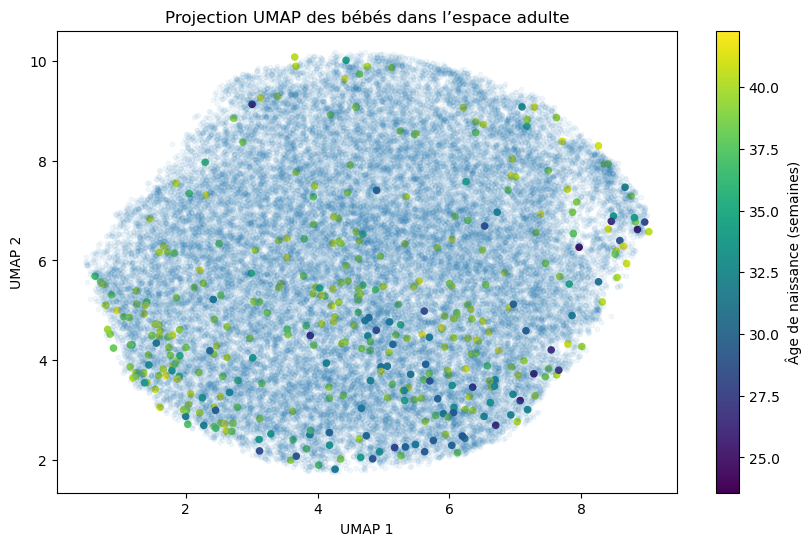

In [21]:
# Afficher les points colorés selon birth_age
plt.figure(figsize=(10, 6))
scatter = plt.scatter(
    baby_2d[:, 0],
    baby_2d[:, 1],
    c=labels_dHCP['birth_age'],
    cmap='viridis',
    s=20
)

plt.scatter(umap_2d[:, 0], umap_2d[:, 1], cmap='grey', s=10, alpha=0.05)
plt.colorbar(scatter, label='Âge de naissance (semaines)')
plt.title('Projection UMAP des bébés dans l’espace adulte')
plt.xlabel('UMAP 1')
plt.ylabel('UMAP 2')
plt.show()

### Embeddings STS pour dHCP pour un latent de taille 256

In [22]:
# Charger l'espace latent
embeddings_STS_dHCP_256 = pd.read_csv('/neurospin/dico/data/deep_folding/current/models/Champollion_V1_after_ablation_latent_256/STs_right/name14-50-41_171/dHCP_random_embeddings/full_embeddings.csv', index_col=0)
# Charger les labels
labels_dHCP = pd.read_csv('/neurospin/dico/data/deep_folding/current/datasets/dHCP_374_subjects/participants.csv')

print("Shape embeddings",embeddings_STS_dHCP_256.shape)
print("Shape labels", labels_dHCP.shape)

# Filtrer les lignes avec labels
embeddings_STS_dHCP_256= embeddings_STS_dHCP_256.loc[embeddings_STS_dHCP_256.index.isin(labels_dHCP['Subject'])]
# Fusionner les labels
embeddings_STS_dHCP_256 = embeddings_STS_dHCP_256.join(labels_dHCP.set_index('Subject'))

print(embeddings_STS_dHCP_256.columns)

print("Shape embeddings",embeddings_STS_dHCP_256.shape)
print("Shape labels", labels_dHCP.shape)

Shape embeddings (374, 256)
Shape labels (374, 8)
Index(['dim1', 'dim2', 'dim3', 'dim4', 'dim5', 'dim6', 'dim7', 'dim8', 'dim9',
       'dim10',
       ...
       'dim254', 'dim255', 'dim256', 'session_id', 'birth_age', 'Preterm_28',
       'Preterm_30', 'Preterm_32', 'Preterm_34', 'Preterm_37'],
      dtype='object', length=263)
Shape embeddings (374, 263)
Shape labels (374, 8)


In [23]:
X_babies_256 = embeddings_STS_dHCP_256.iloc[:, :256]
Xs_babies_256 = StandardScaler().fit_transform(X_babies_256)
umap_2d = umap.UMAP(n_components=2, random_state=42).fit_transform(Xs_babies_256)


/neurospin/dico/rmenasria/Runs/03_main/Program/main_pixi/.pixi/envs/default/lib/python3.11/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/neurospin/dico/rmenasria/Runs/03_main/Program/main_pixi/.pixi/envs/default/lib/python3.11/site-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


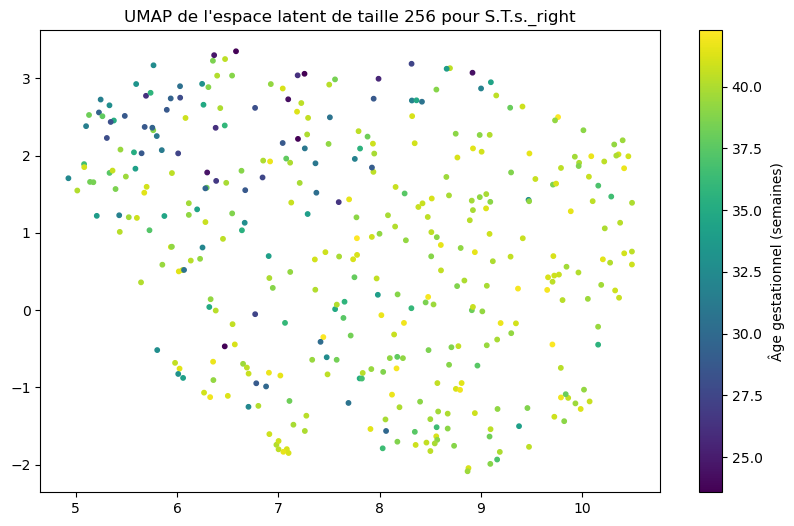

In [24]:
# Visualisation
plt.figure(figsize=(10, 6))
plt.scatter(umap_2d[:, 0], umap_2d[:, 1], c=embeddings_STS_dHCP['birth_age'], cmap='viridis', s=10)
plt.colorbar(label='Âge gestationnel (semaines)')
plt.title("UMAP de l'espace latent de taille 256 pour S.T.s._right")
plt.show()

In [25]:
# Charger l'espace latent
embeddings_STS_UKB_256 = pd.read_csv('/neurospin/dico/data/deep_folding/current/models/Champollion_V1_after_ablation_latent_256/STs_right/name14-50-41_171//ukb40_random_embeddings/full_embeddings.csv', index_col=0)

print("Shape embeddings",embeddings_STS_UKB_256.shape)


Shape embeddings (42433, 256)


In [26]:
# Deuxième UMAP
global_scaler = StandardScaler()
X_adults_256 = embeddings_STS_UKB_256.iloc[:, :256]
Xs_adults_256 = global_scaler.fit_transform(X_adults_256)
umap_2d = umap.UMAP(n_components=2, random_state=42).fit_transform(Xs_adults_256)

/neurospin/dico/rmenasria/Runs/03_main/Program/main_pixi/.pixi/envs/default/lib/python3.11/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/neurospin/dico/rmenasria/Runs/03_main/Program/main_pixi/.pixi/envs/default/lib/python3.11/site-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


/tmp/ipykernel_2133472/1857609818.py:3: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(umap_2d[:, 0], umap_2d[:, 1], cmap='viridis', s=10)


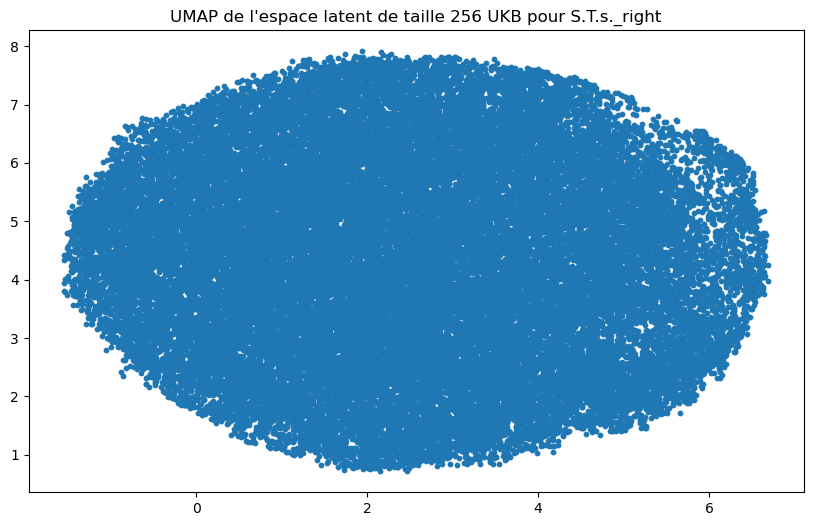

In [28]:
# Visualisation
plt.figure(figsize=(10, 6))
plt.scatter(umap_2d[:, 0], umap_2d[:, 1], cmap='viridis', s=10)
plt.title("UMAP de l'espace latent de taille 256 UKB pour S.T.s._right")
plt.show()

In [30]:
# Entraîner UMAP sur les adultes
umap_model = umap.UMAP(n_components=2, random_state=42)
adult_2d = umap_model.fit_transform(Xs_adults_256)


X_babies_256 = embeddings_STS_dHCP_256.iloc[:, :256]
Xs_babies_256 = global_scaler.transform(X_babies_256)

# Projeter les bébés dans cet espace
baby_2d = umap_model.transform(Xs_babies_256)

/neurospin/dico/rmenasria/Runs/03_main/Program/main_pixi/.pixi/envs/default/lib/python3.11/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/neurospin/dico/rmenasria/Runs/03_main/Program/main_pixi/.pixi/envs/default/lib/python3.11/site-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(
/neurospin/dico/rmenasria/Runs/03_main/Program/main_pixi/.pixi/envs/default/lib/python3.11/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


/tmp/ipykernel_2133472/2943329475.py:11: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(adult_2d[:, 0], adult_2d[:, 1], cmap='viridis', s=10,alpha=0.05)


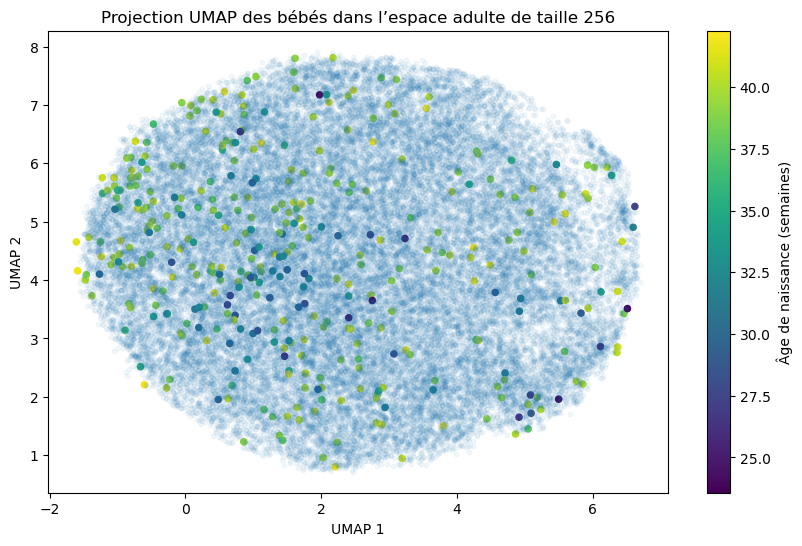

In [32]:
# Afficher les points colorés selon birth_age
plt.figure(figsize=(10, 6))
scatter = plt.scatter(
    baby_2d[:, 0],
    baby_2d[:, 1],
    c=labels_dHCP['birth_age'],
    cmap='viridis',
    s=20
)

plt.scatter(adult_2d[:, 0], adult_2d[:, 1], cmap='viridis', s=10,alpha=0.05)
plt.colorbar(scatter, label='Âge de naissance (semaines)')
plt.title('Projection UMAP des bébés dans l’espace adulte de taille 256')
plt.xlabel('UMAP 1')
plt.ylabel('UMAP 2')
plt.show()

In [33]:
def visualize_embeddings_babies(region="STs_right", projection=False, latent_size=32):
    labels_dHCP = pd.read_csv('/neurospin/dico/data/deep_folding/current/datasets/dHCP_374_subjects/participants.csv')

    # Choix du dossier racine en fonction de la taille du latent
    base_path = (
        "/neurospin/dico/data/deep_folding/current/models/Champollion_V1_after_ablation_latent_256"
        if latent_size == 256
        else "/neurospin/dico/data/deep_folding/current/models/Champollion_V1_after_ablation"
    )

    region_path = os.path.join(base_path, region)
    
    # Trouver le nom du dossier unique automatiquement
    subdirs = [d for d in os.listdir(region_path) if os.path.isdir(os.path.join(region_path, d))]
    if len(subdirs) != 1:
        raise RuntimeError(f"Il y a {len(subdirs)} sous-dossiers dans {region_path}, impossible de choisir automatiquement car il y a plusieurs modèles enregistrés par région.")
    model_folder = subdirs[0]

    # Construire les chemins complets
    baby_path = os.path.join(region_path, model_folder, "dHCP_random_embeddings", "full_embeddings.csv")
    adult_path = os.path.join(region_path, model_folder, "ukb40_random_embeddings", "full_embeddings.csv")

    # Charger les embeddings
    baby_embeddings = pd.read_csv(baby_path, index_col=0)
    adult_embeddings = pd.read_csv(adult_path, index_col=0)

    # Filtrer les lignes avec labels
    baby_embeddings = baby_embeddings.loc[baby_embeddings.index.isin(labels_dHCP['Subject'])]
    # Fusionner les labels
    baby_embeddings = baby_embeddings.join(labels_dHCP.set_index('Subject'))

    if projection:
        global_scaler = StandardScaler()
        # Entraîner UMAP sur les adultes
        umap_model = umap.UMAP(n_components=2, random_state=42)
        Xs_adults = global_scaler.fit_transform(adult_embeddings.iloc[:, :latent_size])
        adult_2d = umap_model.fit_transform(Xs_adults)

        # Projeter les bébés dans cet espace
        Xs_babies = global_scaler.transform(baby_embeddings.iloc[:, :latent_size])
        baby_2d = umap_model.transform(Xs_babies)

        # Affichage
        plt.figure(figsize=(10, 6))
        scatter = plt.scatter(
            baby_2d[:, 0],
            baby_2d[:, 1],
            c=baby_embeddings['birth_age'],
            cmap='viridis',
            s=20
        )
        plt.scatter(adult_2d[:, 0], adult_2d[:, 1], cmap='viridis', s=10,alpha=0.05)
        plt.colorbar(scatter, label='Âge de naissance (semaines)')
        plt.title(f'Projection latente des bébés dans l’espace adulte pour {region}')
        plt.xlabel('UMAP 1')
        plt.ylabel('UMAP 2')
        plt.show()

    else:
        X = StandardScaler().fit_transform(baby_embeddings.iloc[:, :latent_size])
        umap_2d = umap.UMAP(n_components=2, random_state=42).fit_transform(X)
        plt.figure(figsize=(10, 6))
        plt.scatter(umap_2d[:, 0], umap_2d[:, 1], c=baby_embeddings['birth_age'], cmap='viridis', s=10)
        plt.colorbar(label='Âge gestationnel (semaines)')
        plt.title(f"UMAP de l'espace latent des bébés pour {region}")
        plt.xlabel("UMAP 1")
        plt.ylabel("UMAP 2")
        plt.show()


/neurospin/dico/rmenasria/Runs/03_main/Program/main_pixi/.pixi/envs/default/lib/python3.11/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/neurospin/dico/rmenasria/Runs/03_main/Program/main_pixi/.pixi/envs/default/lib/python3.11/site-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(
/neurospin/dico/rmenasria/Runs/03_main/Program/main_pixi/.pixi/envs/default/lib/python3.11/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/tmp/ipykernel_2133472/1599373385.py:52: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(adult_2d[:, 0], adult_2d[:, 1], cmap='viridis', s=10,alpha=0.05)


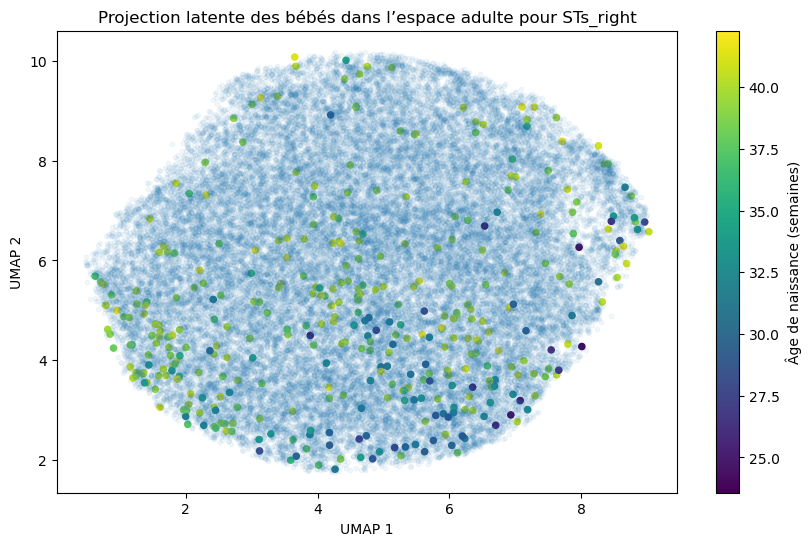

In [34]:
# Vérification de la fonction précédente 

visualize_embeddings_babies(region="STs_right",projection=True,latent_size=32)

### Enregistrement d'une figure avec toutes les projections

In [35]:
def get_region_list(base_path):
    return sorted([
        d for d in os.listdir(base_path)
        if os.path.isdir(os.path.join(base_path, d))
           and not d.startswith('all_models')
           and not d.startswith('hcp')
           and not d.startswith('ukb')
           and not d.endswith('.csv')
           and not d.endswith('.sh')
           and not d.endswith('embeddings')
    ])




In [36]:
def visualize_embeddings_babies_ax(region="STs_right", projection=False, latent_size=32, ax=None):
    labels_dHCP = pd.read_csv('/neurospin/dico/data/deep_folding/current/datasets/dHCP_374_subjects/participants.csv')

    base_path = (
        "/neurospin/dico/data/deep_folding/current/models/Champollion_V1_after_ablation_latent_256"
        if latent_size == 256
        else "/neurospin/dico/data/deep_folding/current/models/Champollion_V1_after_ablation"
    )

    region_path = os.path.join(base_path, region)
    subdirs = [d for d in os.listdir(region_path) if os.path.isdir(os.path.join(region_path, d))]
    if len(subdirs) != 1:
        print(f"[AVERTISSEMENT] {region}: {len(subdirs)} sous-dossiers — ignoré.")
        return

    model_folder = subdirs[0]
    baby_path = os.path.join(region_path, model_folder, "dHCP_random_embeddings", "full_embeddings.csv")
    adult_path = os.path.join(region_path, model_folder, "ukb40_random_embeddings", "full_embeddings.csv")

    try:
        baby_embeddings = pd.read_csv(baby_path, index_col=0)
        adult_embeddings = pd.read_csv(adult_path, index_col=0)
    except Exception as e:
        print(f"[ERREUR] Chargement échoué pour {region}: {e}")
        return

    baby_embeddings = baby_embeddings.loc[baby_embeddings.index.isin(labels_dHCP['Subject'])]
    baby_embeddings = baby_embeddings.join(labels_dHCP.set_index('Subject'))

    if projection:
        global_scaler = StandardScaler()
        # Entraîner UMAP sur les adultes
        umap_model = umap.UMAP(n_components=2, random_state=42)
        Xs_adults = global_scaler.fit_transform(adult_embeddings.iloc[:, :latent_size])
        adult_2d = umap_model.fit_transform(Xs_adults)

        # Projeter les bébés dans cet espace
        Xs_babies = global_scaler.transform(baby_embeddings.iloc[:, :latent_size])
        baby_2d = umap_model.transform(Xs_babies)
        # Tracer adultes en arrière-plan (transparence, couleur grise)
        ax.scatter(adult_2d[:, 0], adult_2d[:, 1], c='gray', alpha=0.05, s=10, label='Adults')
        scatter = ax.scatter(baby_2d[:, 0], baby_2d[:, 1], c=baby_embeddings['birth_age'], cmap='viridis', s=10)

    else:
        X = StandardScaler().fit_transform(baby_embeddings.iloc[:, :latent_size])
        umap_2d = umap.UMAP(n_components=2, random_state=42).fit_transform(X)
        scatter = ax.scatter(umap_2d[:, 0], umap_2d[:, 1], c=baby_embeddings['birth_age'], cmap='viridis', s=10)

    ax.set_title(region)
    ax.set_xlabel('UMAP 1')
    ax.set_ylabel('UMAP 2')
    return scatter


In [26]:
# Paramètres
latent_size = 32
projection = True  # ou False

# Liste des régions
base_path = (
        "/neurospin/dico/data/deep_folding/current/models/Champollion_V1_after_ablation_latent_256"
        if latent_size == 256
        else "/neurospin/dico/data/deep_folding/current/models/Champollion_V1_after_ablation"
    )
region_list = get_region_list(base_path)
print(region_list)

# Si besoin on peut distinguer par hémisphère
right_regions_list = [region for region in region_list if region.endswith("right")]
left_regions_list = [region for region in region_list if region.endswith("left")]

print(len(right_regions_list))
print(len(left_regions_list))

# Taille de la grille
n = len(region_list)
cols = 5
rows = (n + cols - 1) // cols

# Création de la figure
fig, axs = plt.subplots(rows, cols, figsize=(cols * 4, rows * 4), constrained_layout=True)
axs = axs.flatten()

for i, region in enumerate(region_list):
    print("Traitement de la région :", region)
    ax = axs[i]
    try:
        scatter = visualize_embeddings_babies_ax(region, projection=projection, latent_size=latent_size, ax=ax)
    except Exception as e:
        print(f"[Erreur] pour {region}: {e}")
        ax.set_visible(False)

# Cacher les sous-axes inutilisés
for j in range(i+1, len(axs)):
    axs[j].set_visible(False)

# Colorbar globale
cbar = fig.colorbar(scatter, ax=axs, shrink=0.6, label='Âge de naissance (semaines)')

# Sauvegarde
fig.suptitle(f"UMAP des bébés ({'projection adulte' if projection else 'UMAP direct'}) - latent={latent_size}", fontsize=16)
fig.savefig(f"bebes_regions_latent{latent_size}_{'proj' if projection else 'umap'}.png", dpi=300)
plt.close(fig)


['CINGULATE_left', 'CINGULATE_right', 'FCLp-subsc-FCLa-INSULA_left', 'FCLp-subsc-FCLa-INSULA_right', 'FCMpost-SpC_left', 'FCMpost-SpC_right', 'FColl-SRh_left', 'FColl-SRh_right', 'FIP_left', 'FIP_right', 'FPO-SCu-ScCal_left', 'FPO-SCu-ScCal_right', 'LARGE_CINGULATE_left', 'LARGE_CINGULATE_right', 'Lobule_parietal_sup_left', 'Lobule_parietal_sup_right', 'OCCIPITAL_left', 'OCCIPITAL_right', 'SC-SPeC_left', 'SC-SPeC_right', 'SC-SPoC_left', 'SC-SPoC_right', 'SC-sylv_left', 'SC-sylv_right', 'SFinf-BROCA-SPeCinf_left', 'SFinf-BROCA-SPeCinf_right', 'SFint-FCMant_left', 'SFint-FCMant_right', 'SFint-SR_left', 'SFint-SR_right', 'SFinter-SFsup_left', 'SFinter-SFsup_right', 'SFmarginal-SFinfant_left', 'SFmarginal-SFinfant_right', 'SFmedian-SFpoltr-SFsup_left', 'SFmedian-SFpoltr-SFsup_right', 'SOr-SOlf_left', 'SOr-SOlf_right', 'SOr_left', 'SOr_right', 'SPeC_left', 'SPeC_right', 'SPoC_left', 'SPoC_right', 'STi-SOTlat_left', 'STi-SOTlat_right', 'STi-STs-STpol_left', 'STi-STs-STpol_right', 'STs_left',

/neurospin/dico/rmenasria/Runs/01_essai/Program/env_pixi/.pixi/envs/default/lib/python3.11/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/neurospin/dico/rmenasria/Runs/01_essai/Program/env_pixi/.pixi/envs/default/lib/python3.11/site-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


Traitement de la région : CINGULATE_right


/neurospin/dico/rmenasria/Runs/01_essai/Program/env_pixi/.pixi/envs/default/lib/python3.11/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/neurospin/dico/rmenasria/Runs/01_essai/Program/env_pixi/.pixi/envs/default/lib/python3.11/site-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


Traitement de la région : FCLp-subsc-FCLa-INSULA_left


/neurospin/dico/rmenasria/Runs/01_essai/Program/env_pixi/.pixi/envs/default/lib/python3.11/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/neurospin/dico/rmenasria/Runs/01_essai/Program/env_pixi/.pixi/envs/default/lib/python3.11/site-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


Traitement de la région : FCLp-subsc-FCLa-INSULA_right


/neurospin/dico/rmenasria/Runs/01_essai/Program/env_pixi/.pixi/envs/default/lib/python3.11/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/neurospin/dico/rmenasria/Runs/01_essai/Program/env_pixi/.pixi/envs/default/lib/python3.11/site-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


Traitement de la région : FCMpost-SpC_left


/neurospin/dico/rmenasria/Runs/01_essai/Program/env_pixi/.pixi/envs/default/lib/python3.11/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/neurospin/dico/rmenasria/Runs/01_essai/Program/env_pixi/.pixi/envs/default/lib/python3.11/site-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


Traitement de la région : FCMpost-SpC_right


/neurospin/dico/rmenasria/Runs/01_essai/Program/env_pixi/.pixi/envs/default/lib/python3.11/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/neurospin/dico/rmenasria/Runs/01_essai/Program/env_pixi/.pixi/envs/default/lib/python3.11/site-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


Traitement de la région : FColl-SRh_left


/neurospin/dico/rmenasria/Runs/01_essai/Program/env_pixi/.pixi/envs/default/lib/python3.11/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/neurospin/dico/rmenasria/Runs/01_essai/Program/env_pixi/.pixi/envs/default/lib/python3.11/site-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


Traitement de la région : FColl-SRh_right


/neurospin/dico/rmenasria/Runs/01_essai/Program/env_pixi/.pixi/envs/default/lib/python3.11/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/neurospin/dico/rmenasria/Runs/01_essai/Program/env_pixi/.pixi/envs/default/lib/python3.11/site-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


Traitement de la région : FIP_left


/neurospin/dico/rmenasria/Runs/01_essai/Program/env_pixi/.pixi/envs/default/lib/python3.11/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/neurospin/dico/rmenasria/Runs/01_essai/Program/env_pixi/.pixi/envs/default/lib/python3.11/site-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


Traitement de la région : FIP_right


/neurospin/dico/rmenasria/Runs/01_essai/Program/env_pixi/.pixi/envs/default/lib/python3.11/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/neurospin/dico/rmenasria/Runs/01_essai/Program/env_pixi/.pixi/envs/default/lib/python3.11/site-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


Traitement de la région : FPO-SCu-ScCal_left


/neurospin/dico/rmenasria/Runs/01_essai/Program/env_pixi/.pixi/envs/default/lib/python3.11/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/neurospin/dico/rmenasria/Runs/01_essai/Program/env_pixi/.pixi/envs/default/lib/python3.11/site-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


Traitement de la région : FPO-SCu-ScCal_right


/neurospin/dico/rmenasria/Runs/01_essai/Program/env_pixi/.pixi/envs/default/lib/python3.11/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/neurospin/dico/rmenasria/Runs/01_essai/Program/env_pixi/.pixi/envs/default/lib/python3.11/site-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


Traitement de la région : LARGE_CINGULATE_left


/neurospin/dico/rmenasria/Runs/01_essai/Program/env_pixi/.pixi/envs/default/lib/python3.11/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/neurospin/dico/rmenasria/Runs/01_essai/Program/env_pixi/.pixi/envs/default/lib/python3.11/site-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


Traitement de la région : LARGE_CINGULATE_right


/neurospin/dico/rmenasria/Runs/01_essai/Program/env_pixi/.pixi/envs/default/lib/python3.11/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/neurospin/dico/rmenasria/Runs/01_essai/Program/env_pixi/.pixi/envs/default/lib/python3.11/site-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


Traitement de la région : Lobule_parietal_sup_left


/neurospin/dico/rmenasria/Runs/01_essai/Program/env_pixi/.pixi/envs/default/lib/python3.11/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/neurospin/dico/rmenasria/Runs/01_essai/Program/env_pixi/.pixi/envs/default/lib/python3.11/site-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


Traitement de la région : Lobule_parietal_sup_right


/neurospin/dico/rmenasria/Runs/01_essai/Program/env_pixi/.pixi/envs/default/lib/python3.11/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/neurospin/dico/rmenasria/Runs/01_essai/Program/env_pixi/.pixi/envs/default/lib/python3.11/site-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


Traitement de la région : OCCIPITAL_left


/neurospin/dico/rmenasria/Runs/01_essai/Program/env_pixi/.pixi/envs/default/lib/python3.11/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/neurospin/dico/rmenasria/Runs/01_essai/Program/env_pixi/.pixi/envs/default/lib/python3.11/site-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


Traitement de la région : OCCIPITAL_right


/neurospin/dico/rmenasria/Runs/01_essai/Program/env_pixi/.pixi/envs/default/lib/python3.11/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/neurospin/dico/rmenasria/Runs/01_essai/Program/env_pixi/.pixi/envs/default/lib/python3.11/site-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


Traitement de la région : SC-SPeC_left


/neurospin/dico/rmenasria/Runs/01_essai/Program/env_pixi/.pixi/envs/default/lib/python3.11/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/neurospin/dico/rmenasria/Runs/01_essai/Program/env_pixi/.pixi/envs/default/lib/python3.11/site-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


Traitement de la région : SC-SPeC_right


/neurospin/dico/rmenasria/Runs/01_essai/Program/env_pixi/.pixi/envs/default/lib/python3.11/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/neurospin/dico/rmenasria/Runs/01_essai/Program/env_pixi/.pixi/envs/default/lib/python3.11/site-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


Traitement de la région : SC-SPoC_left


/neurospin/dico/rmenasria/Runs/01_essai/Program/env_pixi/.pixi/envs/default/lib/python3.11/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/neurospin/dico/rmenasria/Runs/01_essai/Program/env_pixi/.pixi/envs/default/lib/python3.11/site-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


Traitement de la région : SC-SPoC_right


/neurospin/dico/rmenasria/Runs/01_essai/Program/env_pixi/.pixi/envs/default/lib/python3.11/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/neurospin/dico/rmenasria/Runs/01_essai/Program/env_pixi/.pixi/envs/default/lib/python3.11/site-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


Traitement de la région : SC-sylv_left


/neurospin/dico/rmenasria/Runs/01_essai/Program/env_pixi/.pixi/envs/default/lib/python3.11/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/neurospin/dico/rmenasria/Runs/01_essai/Program/env_pixi/.pixi/envs/default/lib/python3.11/site-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


Traitement de la région : SC-sylv_right


/neurospin/dico/rmenasria/Runs/01_essai/Program/env_pixi/.pixi/envs/default/lib/python3.11/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/neurospin/dico/rmenasria/Runs/01_essai/Program/env_pixi/.pixi/envs/default/lib/python3.11/site-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


Traitement de la région : SFinf-BROCA-SPeCinf_left


/neurospin/dico/rmenasria/Runs/01_essai/Program/env_pixi/.pixi/envs/default/lib/python3.11/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/neurospin/dico/rmenasria/Runs/01_essai/Program/env_pixi/.pixi/envs/default/lib/python3.11/site-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


Traitement de la région : SFinf-BROCA-SPeCinf_right


/neurospin/dico/rmenasria/Runs/01_essai/Program/env_pixi/.pixi/envs/default/lib/python3.11/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/neurospin/dico/rmenasria/Runs/01_essai/Program/env_pixi/.pixi/envs/default/lib/python3.11/site-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


Traitement de la région : SFint-FCMant_left


/neurospin/dico/rmenasria/Runs/01_essai/Program/env_pixi/.pixi/envs/default/lib/python3.11/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/neurospin/dico/rmenasria/Runs/01_essai/Program/env_pixi/.pixi/envs/default/lib/python3.11/site-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


Traitement de la région : SFint-FCMant_right


/neurospin/dico/rmenasria/Runs/01_essai/Program/env_pixi/.pixi/envs/default/lib/python3.11/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/neurospin/dico/rmenasria/Runs/01_essai/Program/env_pixi/.pixi/envs/default/lib/python3.11/site-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


Traitement de la région : SFint-SR_left


/neurospin/dico/rmenasria/Runs/01_essai/Program/env_pixi/.pixi/envs/default/lib/python3.11/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/neurospin/dico/rmenasria/Runs/01_essai/Program/env_pixi/.pixi/envs/default/lib/python3.11/site-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


Traitement de la région : SFint-SR_right


/neurospin/dico/rmenasria/Runs/01_essai/Program/env_pixi/.pixi/envs/default/lib/python3.11/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/neurospin/dico/rmenasria/Runs/01_essai/Program/env_pixi/.pixi/envs/default/lib/python3.11/site-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


Traitement de la région : SFinter-SFsup_left


/neurospin/dico/rmenasria/Runs/01_essai/Program/env_pixi/.pixi/envs/default/lib/python3.11/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/neurospin/dico/rmenasria/Runs/01_essai/Program/env_pixi/.pixi/envs/default/lib/python3.11/site-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


Traitement de la région : SFinter-SFsup_right


/neurospin/dico/rmenasria/Runs/01_essai/Program/env_pixi/.pixi/envs/default/lib/python3.11/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/neurospin/dico/rmenasria/Runs/01_essai/Program/env_pixi/.pixi/envs/default/lib/python3.11/site-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


Traitement de la région : SFmarginal-SFinfant_left


/neurospin/dico/rmenasria/Runs/01_essai/Program/env_pixi/.pixi/envs/default/lib/python3.11/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/neurospin/dico/rmenasria/Runs/01_essai/Program/env_pixi/.pixi/envs/default/lib/python3.11/site-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


Traitement de la région : SFmarginal-SFinfant_right


/neurospin/dico/rmenasria/Runs/01_essai/Program/env_pixi/.pixi/envs/default/lib/python3.11/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/neurospin/dico/rmenasria/Runs/01_essai/Program/env_pixi/.pixi/envs/default/lib/python3.11/site-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


Traitement de la région : SFmedian-SFpoltr-SFsup_left


/neurospin/dico/rmenasria/Runs/01_essai/Program/env_pixi/.pixi/envs/default/lib/python3.11/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/neurospin/dico/rmenasria/Runs/01_essai/Program/env_pixi/.pixi/envs/default/lib/python3.11/site-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


Traitement de la région : SFmedian-SFpoltr-SFsup_right


/neurospin/dico/rmenasria/Runs/01_essai/Program/env_pixi/.pixi/envs/default/lib/python3.11/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/neurospin/dico/rmenasria/Runs/01_essai/Program/env_pixi/.pixi/envs/default/lib/python3.11/site-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


Traitement de la région : SOr-SOlf_left


/neurospin/dico/rmenasria/Runs/01_essai/Program/env_pixi/.pixi/envs/default/lib/python3.11/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/neurospin/dico/rmenasria/Runs/01_essai/Program/env_pixi/.pixi/envs/default/lib/python3.11/site-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


Traitement de la région : SOr-SOlf_right


/neurospin/dico/rmenasria/Runs/01_essai/Program/env_pixi/.pixi/envs/default/lib/python3.11/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/neurospin/dico/rmenasria/Runs/01_essai/Program/env_pixi/.pixi/envs/default/lib/python3.11/site-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


Traitement de la région : SOr_left


/neurospin/dico/rmenasria/Runs/01_essai/Program/env_pixi/.pixi/envs/default/lib/python3.11/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/neurospin/dico/rmenasria/Runs/01_essai/Program/env_pixi/.pixi/envs/default/lib/python3.11/site-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


Traitement de la région : SOr_right


/neurospin/dico/rmenasria/Runs/01_essai/Program/env_pixi/.pixi/envs/default/lib/python3.11/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/neurospin/dico/rmenasria/Runs/01_essai/Program/env_pixi/.pixi/envs/default/lib/python3.11/site-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


Traitement de la région : SPeC_left


/neurospin/dico/rmenasria/Runs/01_essai/Program/env_pixi/.pixi/envs/default/lib/python3.11/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/neurospin/dico/rmenasria/Runs/01_essai/Program/env_pixi/.pixi/envs/default/lib/python3.11/site-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


Traitement de la région : SPeC_right


/neurospin/dico/rmenasria/Runs/01_essai/Program/env_pixi/.pixi/envs/default/lib/python3.11/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/neurospin/dico/rmenasria/Runs/01_essai/Program/env_pixi/.pixi/envs/default/lib/python3.11/site-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


Traitement de la région : SPoC_left


/neurospin/dico/rmenasria/Runs/01_essai/Program/env_pixi/.pixi/envs/default/lib/python3.11/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/neurospin/dico/rmenasria/Runs/01_essai/Program/env_pixi/.pixi/envs/default/lib/python3.11/site-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


Traitement de la région : SPoC_right


/neurospin/dico/rmenasria/Runs/01_essai/Program/env_pixi/.pixi/envs/default/lib/python3.11/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/neurospin/dico/rmenasria/Runs/01_essai/Program/env_pixi/.pixi/envs/default/lib/python3.11/site-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


Traitement de la région : STi-SOTlat_left


/neurospin/dico/rmenasria/Runs/01_essai/Program/env_pixi/.pixi/envs/default/lib/python3.11/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/neurospin/dico/rmenasria/Runs/01_essai/Program/env_pixi/.pixi/envs/default/lib/python3.11/site-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


Traitement de la région : STi-SOTlat_right


/neurospin/dico/rmenasria/Runs/01_essai/Program/env_pixi/.pixi/envs/default/lib/python3.11/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/neurospin/dico/rmenasria/Runs/01_essai/Program/env_pixi/.pixi/envs/default/lib/python3.11/site-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


Traitement de la région : STi-STs-STpol_left


/neurospin/dico/rmenasria/Runs/01_essai/Program/env_pixi/.pixi/envs/default/lib/python3.11/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/neurospin/dico/rmenasria/Runs/01_essai/Program/env_pixi/.pixi/envs/default/lib/python3.11/site-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


Traitement de la région : STi-STs-STpol_right


/neurospin/dico/rmenasria/Runs/01_essai/Program/env_pixi/.pixi/envs/default/lib/python3.11/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/neurospin/dico/rmenasria/Runs/01_essai/Program/env_pixi/.pixi/envs/default/lib/python3.11/site-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


Traitement de la région : STs_left


/neurospin/dico/rmenasria/Runs/01_essai/Program/env_pixi/.pixi/envs/default/lib/python3.11/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/neurospin/dico/rmenasria/Runs/01_essai/Program/env_pixi/.pixi/envs/default/lib/python3.11/site-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


Traitement de la région : STs_right


/neurospin/dico/rmenasria/Runs/01_essai/Program/env_pixi/.pixi/envs/default/lib/python3.11/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/neurospin/dico/rmenasria/Runs/01_essai/Program/env_pixi/.pixi/envs/default/lib/python3.11/site-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


Traitement de la région : STsbr_left


/neurospin/dico/rmenasria/Runs/01_essai/Program/env_pixi/.pixi/envs/default/lib/python3.11/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/neurospin/dico/rmenasria/Runs/01_essai/Program/env_pixi/.pixi/envs/default/lib/python3.11/site-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


Traitement de la région : STsbr_right


/neurospin/dico/rmenasria/Runs/01_essai/Program/env_pixi/.pixi/envs/default/lib/python3.11/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/neurospin/dico/rmenasria/Runs/01_essai/Program/env_pixi/.pixi/envs/default/lib/python3.11/site-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


Traitement de la région : ScCal-SLi_left


/neurospin/dico/rmenasria/Runs/01_essai/Program/env_pixi/.pixi/envs/default/lib/python3.11/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/neurospin/dico/rmenasria/Runs/01_essai/Program/env_pixi/.pixi/envs/default/lib/python3.11/site-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


Traitement de la région : ScCal-SLi_right


/neurospin/dico/rmenasria/Runs/01_essai/Program/env_pixi/.pixi/envs/default/lib/python3.11/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/neurospin/dico/rmenasria/Runs/01_essai/Program/env_pixi/.pixi/envs/default/lib/python3.11/site-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


Traitement de la région : SsP-SPaint_left


/neurospin/dico/rmenasria/Runs/01_essai/Program/env_pixi/.pixi/envs/default/lib/python3.11/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/neurospin/dico/rmenasria/Runs/01_essai/Program/env_pixi/.pixi/envs/default/lib/python3.11/site-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


Traitement de la région : SsP-SPaint_right


/neurospin/dico/rmenasria/Runs/01_essai/Program/env_pixi/.pixi/envs/default/lib/python3.11/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/neurospin/dico/rmenasria/Runs/01_essai/Program/env_pixi/.pixi/envs/default/lib/python3.11/site-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


Traitement de la région : fronto-parietal_medial_face_left


/neurospin/dico/rmenasria/Runs/01_essai/Program/env_pixi/.pixi/envs/default/lib/python3.11/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/neurospin/dico/rmenasria/Runs/01_essai/Program/env_pixi/.pixi/envs/default/lib/python3.11/site-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


Traitement de la région : fronto-parietal_medial_face_right


/neurospin/dico/rmenasria/Runs/01_essai/Program/env_pixi/.pixi/envs/default/lib/python3.11/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/neurospin/dico/rmenasria/Runs/01_essai/Program/env_pixi/.pixi/envs/default/lib/python3.11/site-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(
